In [3]:
import warnings # 경고문구 없애기
# 경고 메시지를 무시하고 숨기거나
warnings.filterwarnings(action='ignore')

In [5]:
# 필수 과제 - 타이타닉 생존자 예측
import seaborn as sns # seaborn 모듈 임포트

# 데이터셋 불러오기
titanic = sns.load_dataset('titanic') # 타이타닉 데이터 셋 사용

In [7]:
# feature 분석

# head 함수를 이용해 데이터 프레임 첫 5행 출력
print(titanic.head())

   survived  pclass     sex   age  sibsp  parch     fare embarked  class  \
0         0       3    male  22.0      1      0   7.2500        S  Third   
1         1       1  female  38.0      1      0  71.2833        C  First   
2         1       3  female  26.0      0      0   7.9250        S  Third   
3         1       1  female  35.0      1      0  53.1000        S  First   
4         0       3    male  35.0      0      0   8.0500        S  Third   

     who  adult_male deck  embark_town alive  alone  
0    man        True  NaN  Southampton    no  False  
1  woman       False    C    Cherbourg   yes  False  
2  woman       False  NaN  Southampton   yes   True  
3  woman       False    C  Southampton   yes  False  
4    man        True  NaN  Southampton    no   True  


In [9]:
# describe 함수를 통해서 기본적인 통계를 확인
print(titanic.describe())

         survived      pclass         age       sibsp       parch        fare
count  891.000000  891.000000  714.000000  891.000000  891.000000  891.000000
mean     0.383838    2.308642   29.699118    0.523008    0.381594   32.204208
std      0.486592    0.836071   14.526497    1.102743    0.806057   49.693429
min      0.000000    1.000000    0.420000    0.000000    0.000000    0.000000
25%      0.000000    2.000000   20.125000    0.000000    0.000000    7.910400
50%      0.000000    3.000000   28.000000    0.000000    0.000000   14.454200
75%      1.000000    3.000000   38.000000    1.000000    0.000000   31.000000
max      1.000000    3.000000   80.000000    8.000000    6.000000  512.329200


In [15]:
# describe 함수를 통해 확인할 수 있는 count 등이 각각 무슨 뜻인지 설명
# count : 데이터셋에 있는 데이터의 총 개수
# mean : 모든 값을 더한 후 값의 개수로 나눈 평균값
# std : 데이터 값들이 평균에서 얼마나 떨어져 있는지를 나타내는 표준편차
# min : 데이터들 중의 제일 작은 값 (최솟값)
# 25% : 1사분위수(Q1)이자 데이터들 중 하위 25%
# 50% : 중앙값(2사분위수)이자 데이터셋을 정렬했을 때 중앙에 위치한 값
# 75% : 3사분위수(Q3)이자 데이터들 중 상위 25%
# max : 데이터들 중의 제일 큰 값 (최대값)

In [11]:
# 각 열의 결측치 갯수 확인
print(titanic.isnull().sum()) 

survived         0
pclass           0
sex              0
age            177
sibsp            0
parch            0
fare             0
embarked         2
class            0
who              0
adult_male       0
deck           688
embark_town      2
alive            0
alone            0
dtype: int64


In [13]:
# feature engineering
# 결측치 처리
# Age의 결측치는 중앙값으로, Embarked의 결측치는 최빈값으로 대체
titanic['age'].fillna(titanic['age'].median(), inplace=True)
titanic['embarked'].fillna(titanic['embarked'].mode()[0], inplace=True)

# 모두 대체한 후에, 대체 결과를 isnull() 함수와 sum() 함수를 이용해 확인
print(titanic['age'].isnull().sum())
print(titanic['embarked'].isnull().sum())

0
0


In [17]:
# 수치형으로 인코딩
titanic['sex'] = titanic['sex'].replace({'male': 0, 'female': 1}) # sex를 남자는 0, 여자는 1로 변환
titanic['alive'] = titanic['alive'].replace({'no': 0, 'yes': 1}) # alive를 yes는 1, no는 0으로 변환
titanic['embarked'] = titanic['embarked'].replace({'C': 0, 'Q': 1, 'S': 2,}) # embarked는 'C'는 0으로, 'Q'는 1으로, 'S'는 2로 변환

# 변환 결과를 head 함수를 이용해 확인
print(titanic['sex'].head())
print(titanic['alive'].head())
print(titanic['embarked'].head())

0    0
1    1
2    1
3    1
4    0
Name: sex, dtype: int64
0    1
1    0
2    0
3    0
4    1
Name: alive, dtype: int64
0    2
1    0
2    2
3    2
4    2
Name: embarked, dtype: int64


In [23]:
# 새로운 feature 생성
# SibSip, Parch를 통해서 family_size 생성
titanic['family_size'] = titanic['sibsp'] + titanic['parch'] + 1 # 본인도 포함해야 하기 때문에 1을 더함
print(titanic['family_size'].head()) # family_size를 head 함수를 이용해 확인

0    2
1    2
2    1
3    2
4    1
Name: family_size, dtype: int64


In [25]:
# 모델 학습시키기

# 모델을 학습시키기 위한 데이터 준비
titanic = titanic[['survived', 'pclass', 'sex', 'age', 'sibsp', 'parch', 'fare', 'embarked', 'family_size']]

# feature과 target을 분리
X = titanic.drop('survived', axis=1) # feature
y = titanic['survived'] # target

In [27]:
# Logistic Regression를 통해서 생존자 예측하는 모델 학습
# 모델 accuracy를 통해 예측
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# 데이터 분할
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 데이터 스케일링
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# 모델 생성 및 학습
model = LogisticRegression()
model.fit(X_train, y_train)

# 예측
y_pred = model.predict(X_test)

# 평가
print(f"Accuracy: {accuracy_score(y_test, y_pred)}")
print(f"Classification Report:\n{classification_report(y_test, y_pred)}")

Accuracy: 0.8044692737430168
Classification Report:
              precision    recall  f1-score   support

           0       0.82      0.86      0.84       105
           1       0.78      0.73      0.76        74

    accuracy                           0.80       179
   macro avg       0.80      0.79      0.80       179
weighted avg       0.80      0.80      0.80       179



In [77]:
# Decision Tree
# 로지스틱 회귀와 마찬가지로 모델 accuracy를 통해 예측
from sklearn.tree import DecisionTreeClassifier

# 데이터 분할
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 데이터 스케일링
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# 모델 생성 및 학습
model = DecisionTreeClassifier(random_state=42)
model.fit(X_train, y_train)

# 예측
y_pred = model.predict(X_test)

# 평가
print(f"Accuracy: {accuracy_score(y_test, y_pred)}")
print(f"Classification Report:\n{classification_report(y_test, y_pred)}")

Accuracy: 0.770949720670391
Classification Report:
              precision    recall  f1-score   support

           0       0.83      0.76      0.80       105
           1       0.70      0.78      0.74        74

    accuracy                           0.77       179
   macro avg       0.77      0.77      0.77       179
weighted avg       0.78      0.77      0.77       179



In [79]:
# XGBoost
# mean squared error를 통해 test data 예측
import xgboost as xgb

# 데이터 분할
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 데이터 스케일링
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# XGBoost 모델 생성
xgb_model = xgb.XGBRegressor(n_estimators=50, learning_rate=0.1, max_depth=3, random_state=42)

# 모델 학습
xgb_model.fit(X_train_scaled, y_train)

# 예측
y_pred_xgb = xgb_model.predict(X_test_scaled)

# 평가
mse_xgb = mean_squared_error(y_test, y_pred_xgb)
print(f'XGBoost 모델의 MSE: {mse_xgb}')

XGBoost 모델의 MSE: 0.131945466273421


---

In [20]:
# 도전 과제 - 영화 리뷰 감성 분석
import pandas as pd # 판다스 모듈 불러오기

# 데이터셋 불러오기
file_path = 'netflix_reviews.csv'
df = pd.read_csv(file_path)

# 상단 5개, 하단 5개 데이터 확인
head_data = df.head()
tail_data = df.tail()

# 컬럼 정보 및 shape 확인
columns_info = df.columns
shape_info = df.shape

# 결과 출력₩
head_data, tail_data, columns_info, shape_info

(                               reviewId          userName  \
 0  4f8e23e8-860d-4cf2-8a07-0735e9e94dac       Eddy Wijaya   
 1  b36f1a48-1ac6-4dc0-a895-50a520205fef  Tirthesh Poojari   
 2  61ec00cf-0ced-4d96-98b5-b67cde1d4c83     Trupti Ambade   
 3  1a05f4ef-ff9e-46cb-948b-4bd3a27d5d53        Sanju Sahu   
 4  cb98f179-4996-445e-a896-f49313a8c84b      Billy Barras   
 
                                              content  score  thumbsUpCount  \
 0                                         Can't open      1              0   
 1                          The best app😍😍😍😍😍😍😍😍😍😍😍😍😍      5              0   
 2  Most of the famous Korean drama are not dubbed...      2              0   
 3  It's superb but can you please add comments se...      5              0   
 4  The only reason I didn't give it four stars is...      1              0   
 
     reviewCreatedVersion                   at             appVersion  
 0                    NaN  2024-10-19 14:23:00                    NaN  
 1    

In [29]:
# 데이터 전처리

# 전처리 함수 정의
def preprocess_text(text):
    if isinstance(text, float):
        return ""
    text = text.lower()  # 대문자를 소문자로
    text = re.sub(r'[^\w\s]', '', text)  # 구두점 제거
    text = re.sub(r'\d+', '', text)  # 숫자 제거
    text = text.strip()  # 띄어쓰기 제외하고 빈 칸 제거
    return text

# 'content' 컬럼에 대해 전처리 적용
df["content"] = df["content"].apply(preprocess_text)

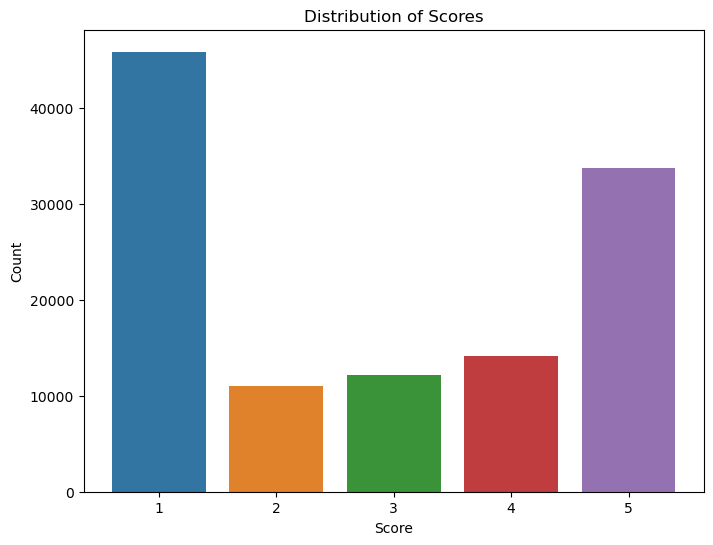

In [22]:
# 3. feature 분석 (EDA)
import matplotlib.pyplot as plt

# 리뷰 점수를 기반으로 한 점수별 개수
score_counts = df['score'].value_counts().sort_index()

x=score_counts.index # x축 리뷰점수
y=score_counts.values # y축 리뷰개수

colors = ['#3274A2', '#E0812B', '#3A9239', '#BF3D3E', '#9472B2']  # 그래프바 색상 리스트

plt.figure(figsize=(8, 6))  # 그래프 크기
plt.bar(x, y, color=colors) # x,y값 그래프 색상
plt.xlabel('Score')         # 라벨
plt.ylabel('Count')         # 라벨
plt.title('Distribution of Scores') # 제목
plt.show() # 그래프 보여주기

In [26]:
# 4. 리뷰 예측 모델 학습시키기 (LSTM)
# import numpy as np
# import pandas as pd
# import re
# import torch
# import torch.nn as nn
# import torch.optim as optim
# from torchtext.data.utils import get_tokenizer
# from torchtext.vocab import build_vocab_from_iterator
# from torch.utils.data import DataLoader, Dataset
# from sklearn.model_selection import train_test_split
# from sklearn.preprocessing import LabelEncoder
# from sklearn.linear_model import LogisticRegression
# from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
# from sklearn.preprocessing import StandardScaler
# import nltk
# nltk.download('punkt')
# nltk.download('stopwords')
# from nltk.corpus import stopwords
# from nltk.tokenize import word_tokenize
# import matplotlib.pyplot as plt
# from tqdm import tqdm
# import torch.nn.functional as F

stop_words = set(stopwords.words('english')) # 불용어

# 데이터셋 클래스 정의
class ReviewDataset(Dataset):
    def __init__(self, reviews, ratings, text_pipeline, label_pipeline):
        self.reviews = reviews.reset_index(drop=True)  # 인덱스 재설정
        self.ratings = ratings.reset_index(drop=True)  # 인덱스 재설정
        self.text_pipeline = text_pipeline
        self.label_pipeline = label_pipeline

    def __len__(self):
        return len(self.reviews)

    def __getitem__(self, idx):
        review = self.text_pipeline(self.reviews[idx])
        rating = self.label_pipeline(self.ratings[idx])
        return review.clone().detach(), torch.tensor(rating)  # clone().detach() 사용

# 패딩을 추가하는 함수
def collate_fn(batch):
    reviews, labels = zip(*batch)
    reviews_padded = nn.utils.rnn.pad_sequence(reviews, batch_first=True)  # 패딩 추가
    return reviews_padded, torch.tensor(labels)

# 텍스트 전처리 함수
def preprocess_text(text):
    if isinstance(text, float) or text is None:
        return ""  # 결측치 또는 None을 빈 문자열로 처리
    text = text.lower()  # 소문자로 변환
    text = re.sub(r'[^a-zA-Z ]', '', text) # 영문 제외 제거

    text = ' '.join([word for word in text.split() if word not in stop_words])  # 불용어 제거

    return text if len(text) > 0 else None  # 빈 문자열은 None으로 처리

# 데이터 전처리
def preprocess(dataframe):
    dataframe = dataframe[dataframe['score'] != 3]                                   # 3점인 리뷰 제거
    dataframe['label'] = np.select([dataframe.score > 3], [1], default=0)     # 긍정 부정 라벨 컬럼 추가    
    dataframe["content"] = dataframe["content"].apply(preprocess_text)

    dataframe = dataframe[dataframe['content'].notna() & (dataframe['content'].str.len() > 0)]      # None 및 빈 문자열 제거    
    return dataframe

# 데이터 로드
df = preprocess(pd.read_csv("netflix_reviews.csv"))

X_train = df['content']  # 리뷰 텍스트
y_train = df['label']  # 리뷰 점수

# 데이터 분할
X_train, X_valid, y_train, y_valid = train_test_split(X_train, y_train, test_size=0.2, random_state=42)

# 토크나이저 정의
tokenizer = get_tokenizer("basic_english")

# 토큰 목록 생성 함수
def yield_tokens(data_iter):
    for text in data_iter:
        yield tokenizer(text)

# 단어 사전 생성
vocab = build_vocab_from_iterator(yield_tokens(X_train), specials=["<unk>"])
vocab.set_default_index(vocab["<unk>"])

# 텍스트 파이프라인 정의
text_pipeline = lambda x: torch.tensor(vocab(tokenizer(x)), dtype=torch.long)  # LongTensor로 변환

# 라벨 인코더 정의
label_encoder = LabelEncoder()
label_encoder.fit(y_train)

# 라벨 파이프라인 정의
label_pipeline = lambda x: label_encoder.transform([x])[0]

# 하이퍼파라미터 정의
VOCAB_SIZE = len(vocab)
EMBED_DIM = 64
HIDDEN_DIM = 258
OUTPUT_DIM = 2  # 예측할 점수 개수
EPOCHS = 5
BATCH_SIZE = 64

# 훈련 데이터
train_dataset = ReviewDataset(X_train, y_train, text_pipeline, label_pipeline)
train_dataloader = DataLoader(train_dataset, batch_size=BATCH_SIZE, shuffle=True, collate_fn=collate_fn)

# 테스트 데이터
test_dataset = ReviewDataset(X_valid, y_valid, text_pipeline, label_pipeline)
test_dataloader = DataLoader(test_dataset, batch_size=BATCH_SIZE, shuffle=False, collate_fn=collate_fn)

# LSTM 모델 정의
class LSTMModel(nn.Module):
    def __init__(self, vocab_size, embed_dim, hidden_dim, output_dim):
        super(LSTMModel, self).__init__()
        self.embedding = nn.EmbeddingBag(vocab_size, embed_dim)
        self.lstm = nn.LSTM(embed_dim, hidden_dim, batch_first=True)
        self.fc = nn.Linear(hidden_dim, output_dim)

    def forward(self, text):
        embedded = self.embedding(text)
        output, (hidden, cell) = self.lstm(embedded.unsqueeze(1))
        return self.fc(hidden[-1])  # 마지막 hidden 상태 반환

# LSTM 모델 초기화
lstm_model = LSTMModel(VOCAB_SIZE, EMBED_DIM, HIDDEN_DIM, OUTPUT_DIM)

# 손실 함수와 옵티마이저 정의
criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(lstm_model.parameters(), lr=0.1)

# LSTM 모델 학습
def train_lstm_model(model, train_loader, criterion, optimizer, epochs=5):
    model.train()
    for epoch in range(epochs):
        epoch_loss = 0
        for reviews, labels in train_loader:
            optimizer.zero_grad()
            outputs = model(reviews)
            
            loss = criterion(outputs, labels)
            loss.backward()
            optimizer.step()
            epoch_loss += loss.item()
        print(f'Epoch {epoch+1}/{epochs}, Loss: {epoch_loss/len(train_loader)}')

# LSTM 모델 학습 실행
train_lstm_model(lstm_model, train_dataloader, criterion, optimizer, EPOCHS)

# 예측 함수
def predict_review(lstm_model, review):
    # LSTM 모델을 평가 모드로 설정
    lstm_model.eval()
    with torch.no_grad():
        tensor_review = text_pipeline(review).clone().detach().unsqueeze(0)
        output = lstm_model(tensor_review)
        # 소프트맥스를 사용하여 확률 계산
        probabilities = F.softmax(output, dim=1)
        predicted_probabilities = probabilities.squeeze().numpy()  # NumPy 배열로 변환
        
        # 가장 높은 확률의 클래스를 예측
        prediction = output.argmax(1).item()
        
        # 라벨 역변환
        predicted_label = label_encoder.inverse_transform([prediction])[0]
        return predicted_label, predicted_probabilities[1]

def convert_score_to_rating(score):
    if 0 <= score <= 19:
        return 1  # 0~19 -> 1점
    elif 20 <= score <= 39:
        return 2  # 20~39 -> 2점
    elif 40 <= score <= 59:
        return 3  # 40~59 -> 3점
    elif 60 <= score <= 79:
        return 4  # 60~79 -> 4점
    elif 80 <= score <= 100:
        return 5  # 80~100 -> 5점
    else:
        return 0  # 범위를 벗어난 경우 None 반환
    
# 새로운 리뷰에 대한 예측
predicted_score, predicted_probabilities = predict_review(lstm_model, "this app is great")
print(f'Predicted Score: {convert_score_to_rating(predicted_probabilities*100)}')
predicted_score, predicted_probabilities = predict_review(lstm_model, "Love you netflix")
print(f'Predicted Score: {convert_score_to_rating(predicted_probabilities*100)}')
predicted_score, predicted_probabilities = predict_review(lstm_model, "Some parts were good, but overall, it felt average")
print(f'Predicted Score: {convert_score_to_rating(predicted_probabilities*100)}')
predicted_score, predicted_probabilities = predict_review(lstm_model, "I liked it! Great moments, though a bit lacking in some areas")
print(f'Predicted Score: {convert_score_to_rating(predicted_probabilities*100)}')
predicted_score, predicted_probabilities = predict_review(lstm_model, "poor app")
print(f'Predicted Score: {convert_score_to_rating(predicted_probabilities*100)}')

Epoch 1/5, Loss: 0.6664914372957839
Epoch 2/5, Loss: 0.6277606020059491
Epoch 3/5, Loss: 0.592884723020129
Epoch 4/5, Loss: 0.5624460454833535
Epoch 5/5, Loss: 0.5366351184903344
Predicted Score: 5
Predicted Score: 5
Predicted Score: 4
Predicted Score: 5
Predicted Score: 1


In [9]:
import pandas as pd
from textblob import TextBlob
from gensim.utils import simple_preprocess

# 텍스트 전처리 함수
def preprocess_text(text):
    if isinstance(text, float) or text is None:
        return ""  # 결측치 또는 None을 빈 문자열로 처리
    
    tokens = simple_preprocess(text, deacc=True)  # simple_preprocess 사용
    return ' '.join(tokens) if tokens else None  # 빈 토큰 리스트를 None으로 처리

# 감성 분석을 위한 함수
def get_sentiment(text):
    return TextBlob(text).sentiment.polarity

# 데이터 로드
df = pd.read_csv("netflix_reviews.csv")

# 전처리 및 감성 분석
df['content'] = df['content'].apply(preprocess_text).fillna('')
df['sentiment'] = df['content'].apply(get_sentiment)
df['sentiment_label'] = df['sentiment'].apply(lambda x: 'positive' if x > 0.1 else ('negative' if x < -0.1 else 'neutral'))
df[['content', 'score', 'sentiment_label']]

,content,score,sentiment_label
0,can open,1,neutral
1,the best app,5,positive
2,most of the famous korean drama are not dubbed...,2,positive
3,it superb but can you please add comments sect...,5,positive
4,the only reason didn give it four stars is tha...,1,neutral
...,...,...,...
116926,really like it there are so many movies and kd...,5,positive
116927,love netflix always enjoy my time using it,5,positive
116928,sound quality is very slow of movies,1,neutral
116929,rate is very expensive bcos we see netflix sun...,1,negative


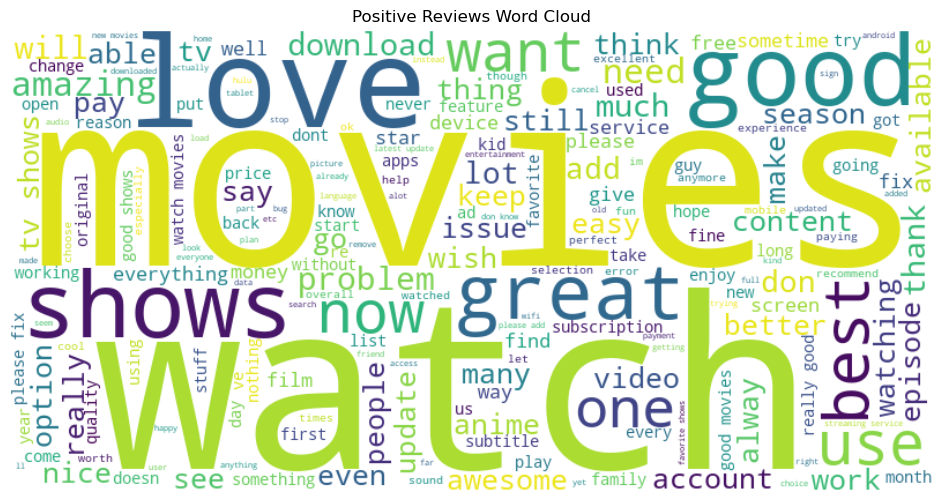

In [13]:
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt

# 워드클라우드 생성을 위한 준비
stopwords = set(STOPWORDS)
stopwords.update(['netflix', 'movie', 'show', 'time', 'app', 'series', 'phone'])

# 긍정 리뷰 모아 워드클라우드 생성
positive_reviews = ' '.join(df[df['sentiment_label'] == 'positive']['content'])
wordcloud = WordCloud(width=800, height=400, background_color='white', stopwords=stopwords).generate(positive_reviews)

# 결과 출력
plt.figure(figsize=(12,6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Positive Reviews Word Cloud')
plt.show()

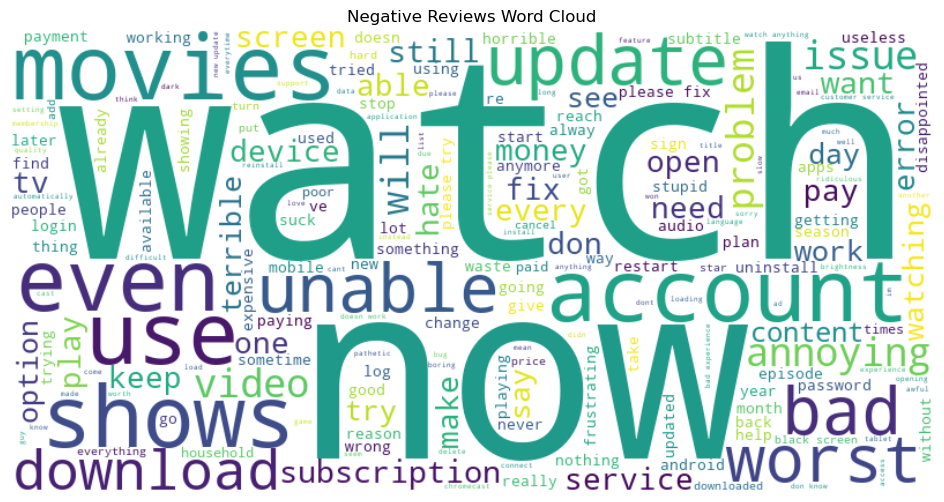

In [15]:
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt

# 워드클라우드 생성을 위한 준비
stopwords = set(STOPWORDS)
stopwords.update(['netflix', 'movie', 'show', 'time', 'app', 'series', 'phone'])

# 부정 리뷰 모아 워드클라우드 생성
negative_reviews = ' '.join(df[df['sentiment_label'] == 'negative']['content'])
wordcloud = WordCloud(width=800, height=400, background_color='white', stopwords=stopwords).generate(negative_reviews)

# 결과 출력
plt.figure(figsize=(12,6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Negative Reviews Word Cloud')
plt.show()